# Задание 3. Pandas
### Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Описание данных: 

### LECTURES.CSV: METADATA FOR THE LECTURES WATCHED BY USERS AS THEY PROGRESS IN THEIR EDUCATION.

lecture_id: foreign key for the train/test content_id column, when the content type is lecture (1).

part: top level category code for the lecture.

tag: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.

type_of: brief description of the core purpose of the lecture.

In [2]:
lectures_df = pd.read_csv('lectures.csv', encoding = 'utf-8')
lectures_df.shape

(418, 4)

### Метод .head:

In [3]:
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


### Метод .describe:

In [4]:
lectures_df.describe() 

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


### Пропуски в df_lectures (пропусков в датафрейме нет):

In [13]:
lectures_df.isna().sum() 

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

### Нужно найти дубликаты в датафрейм:

In [6]:
lectures_df.duplicated().sum()

0

### Информация о датафрейме (тип и кол-во входных значений):

In [7]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


### Анализ связей тэгов и лекций:

In [8]:
lectures_df[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


<AxesSubplot: xlabel='part', ylabel='tag'>

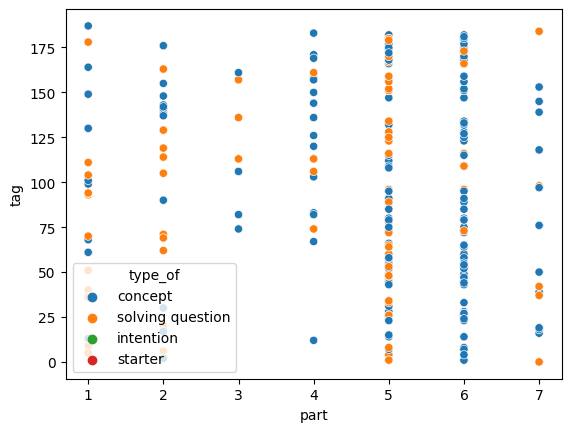

In [9]:
sns.scatterplot(data = lectures_df, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='tag', ylabel='Count'>

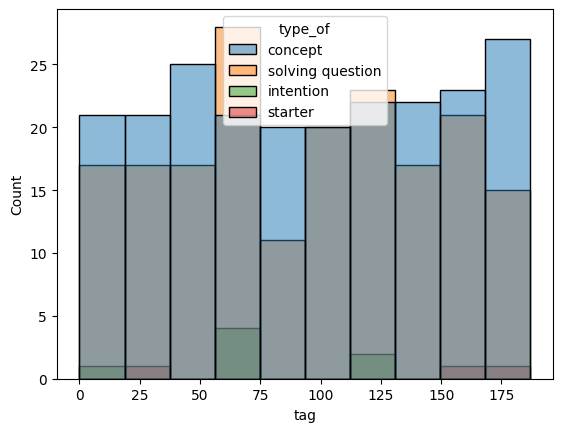

In [10]:
sns.histplot(data = lectures_df, x = 'tag', hue = 'type_of')

### Няглядно-отсутсвие связей

### Анализ связей разделов и лекций:

<AxesSubplot: xlabel='part', ylabel='Count'>

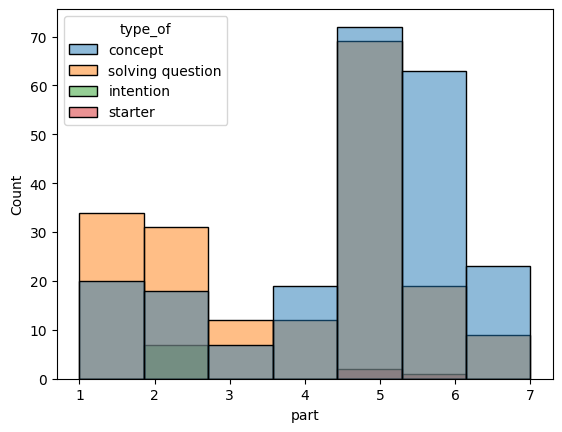

In [11]:
sns.histplot(data = lectures_df, x = 'part', hue = 'type_of', bins = 7)

### отличия по составляющим практики и теории 

### QUESTIONS.CSV: METADATA FOR THE QUESTIONS POSED TO USERS.

question_id: foreign key for the train/test content_id column, when the content type is question (0).

bundle_id: code for which questions are served together.

correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.

part: the relevant section of the TOEIC test.

tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

In [12]:
questions_df = pd.read_csv('questions.csv') 
questions_df.shape

(13523, 5)

In [14]:
questions_df.head() 

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [15]:
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


### Методом .isna() найдем пропуски в датафрейм:

In [17]:
questions_df.isna().sum() 

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

### Имеется пропуск в тэгах (и нужно найти его):

In [18]:
questions_df[questions_df.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


###  Поиск дубликатов в датафрейм:

In [19]:
questions_df.duplicated().sum() 

0

### Информация о датафрейме (тип и кол-во входных значений):

In [20]:
questions_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


### Здесь количественная мера значение-ключ:

In [21]:
questions_df[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<AxesSubplot: xlabel='part', ylabel='Count'>

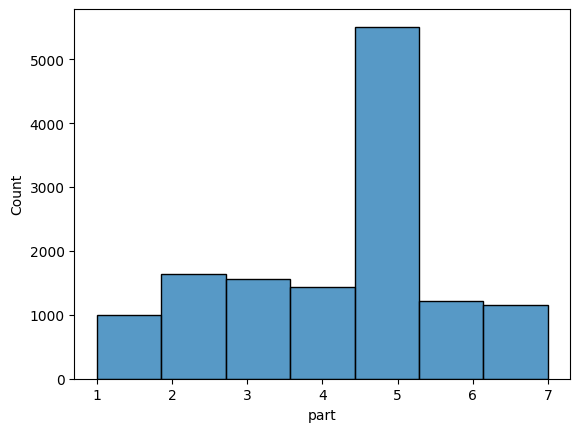

In [22]:
sns.histplot(data = questions_df, x = 'part', bins = 7)

### TRAIN.CSV

row_id: (int64) ID code for the row.

timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.

user_id: (int32) ID code for the user.

content_id: (int16) ID code for the user interaction

content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.

task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.

user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.

answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.

prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.

prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

### Здесь ограничимся количеством строк 1000000, из-зи ограничения ресурсов:

In [23]:
df = pd.read_csv('train.csv', nrows=1000000, encoding = 'utf-8')
df.shape

(1000000, 10)

In [24]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


### Разбивка на категории и числовые данные:

In [25]:
cat_col = []
num_col = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_col += [column_name]
    else:
        num_col += [column_name]

print('Категориальные данные:\t ',cat_col, '\n Число столбцов =', len(cat_col))
print('Числовые данные:\t ', num_col, '\n Число столбцов =', len(num_col))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столбцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столбцов = 9


In [26]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693
std,288675.278932,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


### Гистограммы значений по каждому числовому признаку (о больших к меньшему):

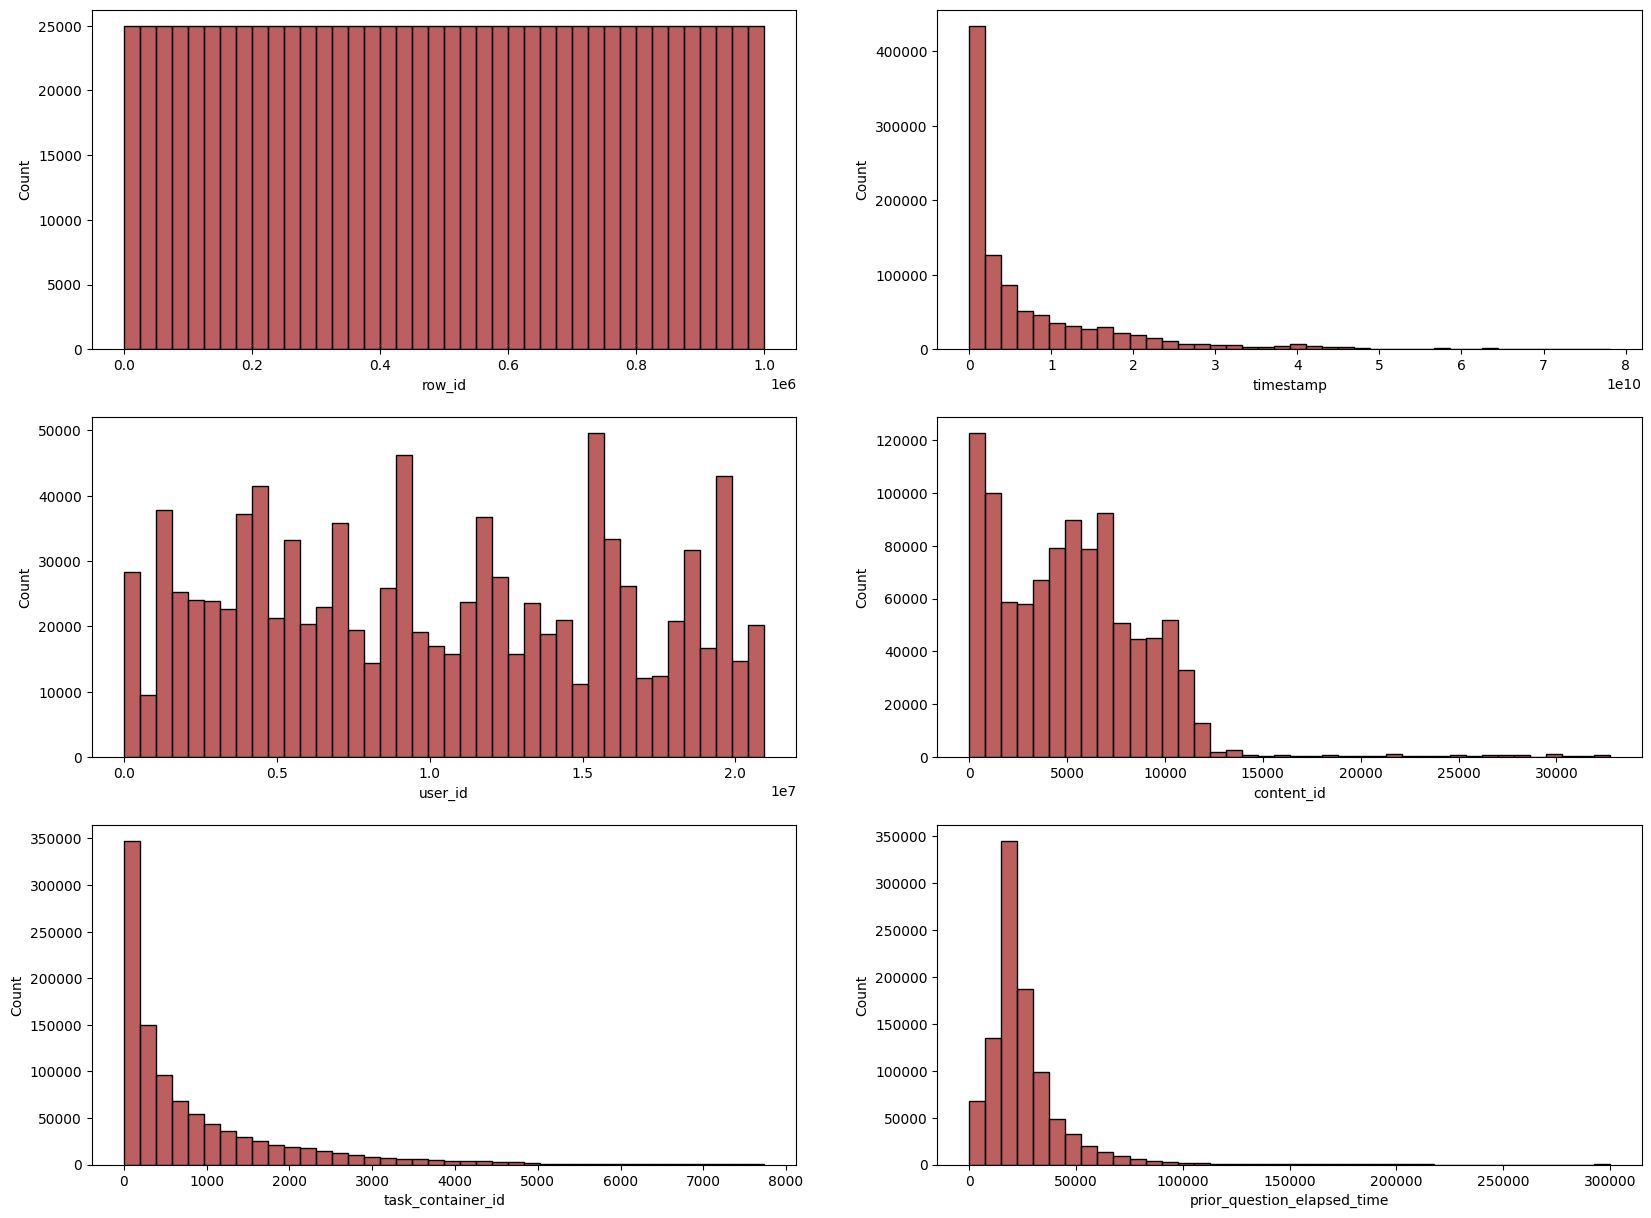

In [27]:
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (20, 15))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 40, color = 'brown')

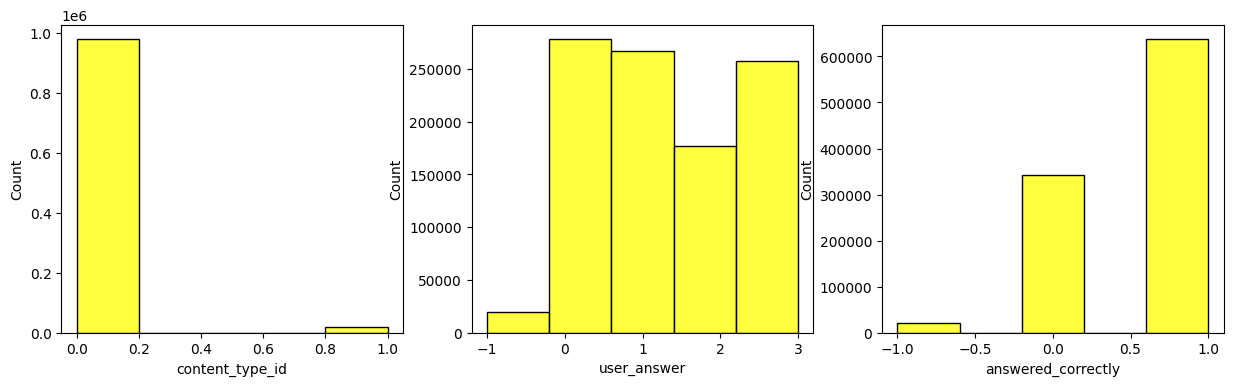

In [28]:
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 5, color = 'yellow')

### Проведём очистку данных:

In [31]:
df.isna().sum()

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       23723
prior_question_had_explanation     3816
dtype: int64

### В столбце времени ответа на вопрос - 23723 пропуска
### В столбце объяснений и ответов - 3816 пропуска

### Пропуски в столбце времени ответа на каждый вопрос:

In [33]:
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
999762,999762,207265143,20938253,26404,1,308,-1,-1,NaN,False
999790,999790,208152685,20938253,22362,1,336,-1,-1,NaN,False
999859,999859,1142327350,20938253,1731,1,406,-1,-1,NaN,False
999901,999901,0,20948951,6040,0,0,3,0,NaN,NaN


### Пропуски в столбце просмотра объяснений и правильных ответов:

In [34]:
df[df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
998929,998929,0,20913319,6659,0,0,1,0,NaN,NaN
999345,999345,0,20913864,4790,0,0,1,1,NaN,NaN
999366,999366,0,20938253,7900,0,0,2,0,NaN,NaN
999901,999901,0,20948951,6040,0,0,3,0,NaN,NaN


In [35]:
df.duplicated().sum()

0

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


### При расчетах и вычислениях произошло переполнение памяти машины, на которой проводились вычисления. необходим поиск оптимизации для уменьшения обьема и ускорения процесса:

#### Можно удалить столбец row_id (т.к. он совпадает с индексом датафрейма), и дополнительно можно изменить тип данных при помощи метода .astype:

In [37]:
df = df.drop('row_id', axis = 1)
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  uint64 
 1   user_id                         1000000 non-null  uint32 
 2   content_id                      1000000 non-null  uint16 
 3   content_type_id                 1000000 non-null  int8   
 4   task_container_id               1000000 non-null  uint16 
 5   user_answer                     1000000 non-null  int8   
 6   answered_correctly              1000000 non-null  int8   
 7   prior_question_elapsed_time     976277 non-null   float32
 8   prior_question_had_explanation  996184 non-null   object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 29.6+ MB


### Оптимизация размера датафрейма:

In [41]:
print(round(76.3 / 29.6, 1))

2.6


После выполненных процедур объем памяти занимаемый датафремом уменьшился в 2,6 раза

### Корреляции числовых признаков и их связь с успеваемостью студентов:

In [42]:
cm = sns.color_palette("vlag", as_cmap = True)
df_corr = df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.001041,0.032189,0.007441,0.364525,-0.001796,0.027571,0.016144
user_id,-0.001041,1.000000,-0.007103,0.004102,-0.072862,-0.002361,-0.014776,0.016981
content_id,0.032189,-0.007103,1.000000,0.420121,0.062908,-0.110374,-0.203327,0.149778
content_type_id,0.007441,0.004102,0.420121,1.000000,-0.013024,-0.283418,-0.438788,nan
task_container_id,0.364525,-0.072862,0.062908,-0.013024,1.000000,0.012135,0.039130,-0.043670
user_answer,-0.001796,-0.002361,-0.110374,-0.283418,0.012135,1.000000,0.126721,0.014283
answered_correctly,0.027571,-0.014776,-0.203327,-0.438788,0.039130,0.126721,1.000000,0.003251
prior_question_elapsed_time,0.016144,0.016981,0.149778,nan,-0.043670,0.014283,0.003251,1.000000


### Добавляем столбец соотношения кол-ва правильных ответов к количеству ответов студентов:

In [43]:
df_corr['cor_ratio'] = df_corr.answered_correctly / df_corr.user_answer
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,-0.001041,0.032189,0.007441,0.364525,-0.001796,0.027571,0.016144,0.032882
user_id,-0.001041,1.000000,-0.007103,0.004102,-0.072862,-0.002361,-0.014776,0.016981,-0.008364
content_id,0.032189,-0.007103,1.000000,0.420121,0.062908,-0.110374,-0.203327,0.149778,0.080741
content_type_id,0.007441,0.004102,0.420121,1.000000,-0.013024,-0.283418,-0.438788,nan,0.249123
task_container_id,0.364525,-0.072862,0.062908,-0.013024,1.000000,0.012135,0.039130,-0.043670,0.023179
user_answer,-0.001796,-0.002361,-0.110374,-0.283418,0.012135,1.000000,0.126721,0.014283,-0.527333
answered_correctly,0.027571,-0.014776,-0.203327,-0.438788,0.039130,0.126721,1.000000,0.003251,0.531547
prior_question_elapsed_time,0.016144,0.016981,0.149778,nan,-0.043670,0.014283,0.003251,1.000000,-0.006744
cor_ratio,0.032882,-0.008364,0.080741,0.249123,0.023179,-0.527333,0.531547,-0.006744,1.000000


In [44]:
df_corr.drop(df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.283418,-0.438788,0.249123
user_answer,-0.283418,1.000000,0.126721,-0.527333
answered_correctly,-0.438788,0.126721,1.000000,0.531547
cor_ratio,0.249123,-0.527333,0.531547,1.000000


### Успеваемость:

<AxesSubplot: xlabel='cor_ratio', ylabel='Count'>

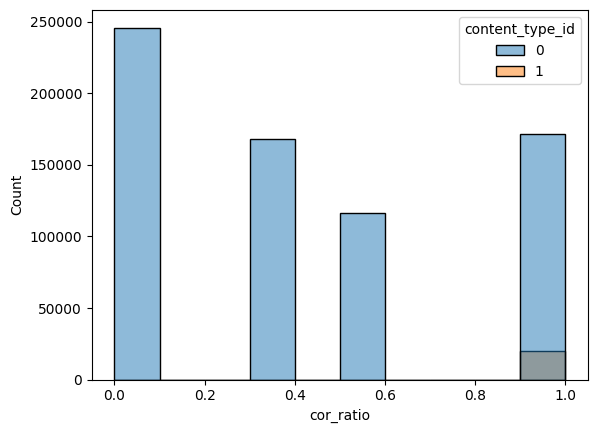

In [45]:
sns.histplot(data = df_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 10)

### Успеваемость, как видно, слабо зависит от типа собития (вопрос или лекция).

### Статистика ответов студентов:  

In [46]:
df.agg({'user_id': pd.Series.nunique}) 

user_id    3824
dtype: int64

In [47]:
unique_df = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
unique_df.head()


,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


In [48]:
unique_df.describe()

,user_id,user_answer,answered_correctly
count,3.824000e+03,3824.000000,3824.000000
mean,1.050633e+07,359.514644,161.481172
std,5.958653e+06,984.492304,457.802761
min,1.150000e+02,1.000000,-2.000000
25%,5.363199e+06,38.000000,11.000000
50%,1.061051e+07,60.000000,23.000000
75%,1.565077e+07,219.000000,94.000000
max,2.094902e+07,16907.000000,6103.000000


##### Разброс ответов (выразим через функцию сокращения разброса ответов)

In [49]:
def rem_emission(df, col, k_std): 
        mean = df[col].mean()
        std_o = df[col].std() 
        return df[(df[col] <= mean + (k_std * std_o))]

In [50]:
unique_df = rem_emission(unique_df, 'user_answer', 1) 

##### Здесь добавим столбец успеваемости:

In [52]:
unique_df['cor_ratio'] = unique_df.answered_correctly / unique_df.user_answer

##### Выводим первые 5 и последние 5 строк полученного датафрейма:

In [54]:
unique_df

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
3819,20913319,575,233,0.405217
3820,20913864,20,7,0.350000
3821,20938253,739,308,0.416779
3822,20948951,78,31,0.397436


In [55]:
unique_df.describe()

,user_id,user_answer,answered_correctly,cor_ratio
count,3.585000e+03,3585.000000,3585.000000,3585.000000
mean,1.052197e+07,159.402789,68.483682,0.383755
std,5.961041e+06,238.836485,111.890436,0.131749
min,1.150000e+02,1.000000,-2.000000,-0.017241
25%,5.386918e+06,36.000000,11.000000,0.293103
50%,1.062930e+07,55.000000,21.000000,0.392857
75%,1.568217e+07,151.000000,66.000000,0.472603
max,2.094902e+07,1335.000000,759.000000,1.500000


### Вычислим среднее значение количества ответов студентов:

In [64]:
unique_med = unique_df.user_answer.median()
print('среднее значение количества ответов у студентов -',int(unique_med))

среднее значение количества ответов у студентов - 55
